In [11]:
import os
os.chdir("/Coding/Spectrum4Geo/") #Change to ProjectDirectory (One Directory above)

In [8]:
#import required libraries
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
import librosa
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import audiosegment

In [9]:
def update_segments(filename,segments, sil_time):
    '''
    filename= audio file path
    segments= Active segment output from pyaudoanalysis
    sil_time = Silence time/ Time threshold above which silence to be considered

    returns:
    list of start and end of silent time frames
    '''
    ans=[]
    tmp=0
    n=len(segments)
    for  idx,t in enumerate(segments):
        if t[0]-tmp>=sil_time:
            ans.append((tmp,t[0]))
        tmp=t[1]
        if idx==n-1:
            fn=librosa.get_duration(filename=filename)
            if fn-tmp>=sil_time:
                ans.append((tmp,fn))
    return ans


data/mono_audio_wav_16kHz/39117.wav


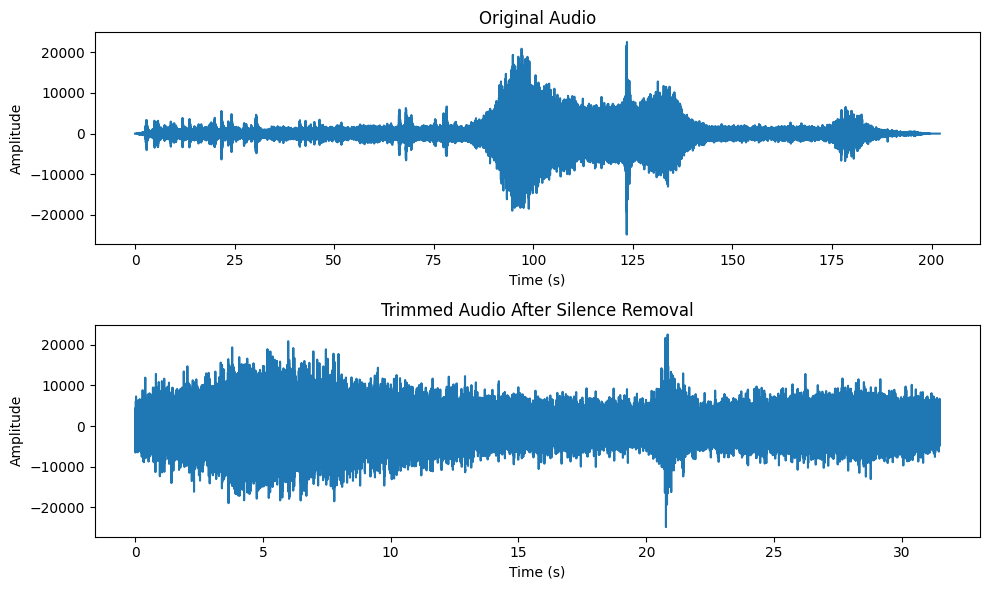

data/mono_audio_wav_16kHz/15777.wav


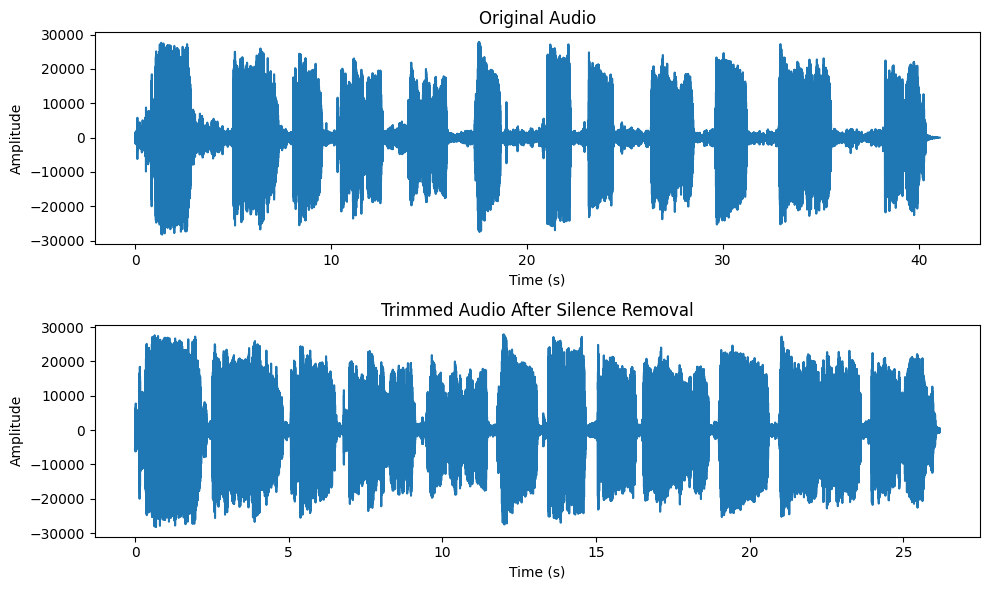

data/mono_audio_wav_16kHz/11591.wav


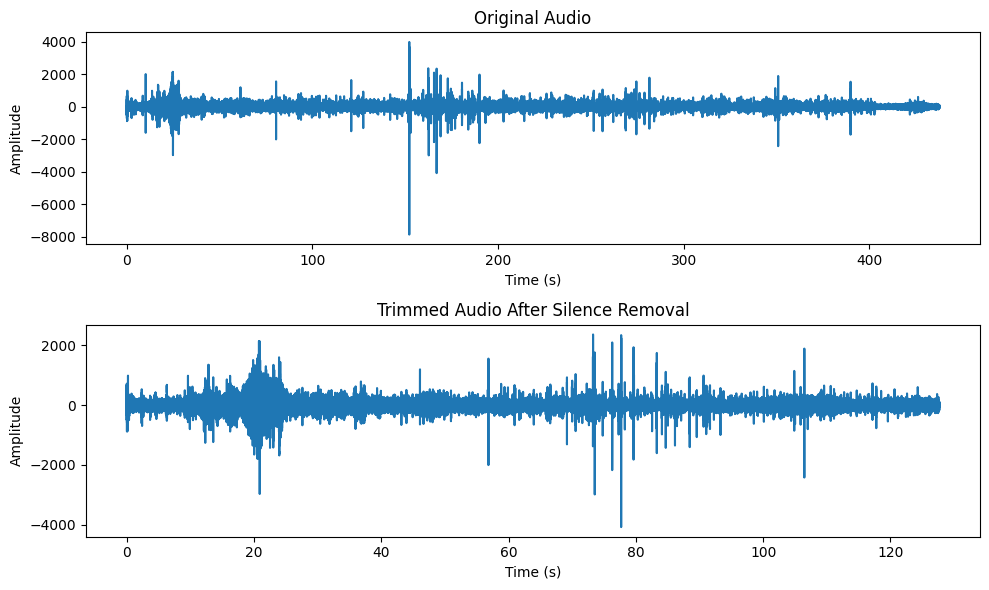

data/mono_audio_wav_16kHz/52420.wav


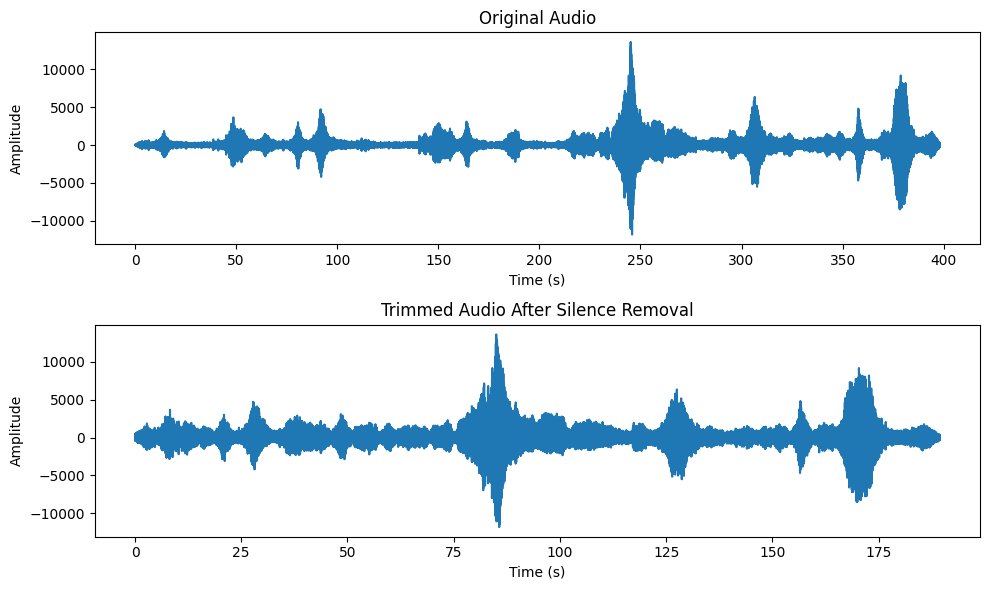

data/mono_audio_wav_16kHz/35816.wav


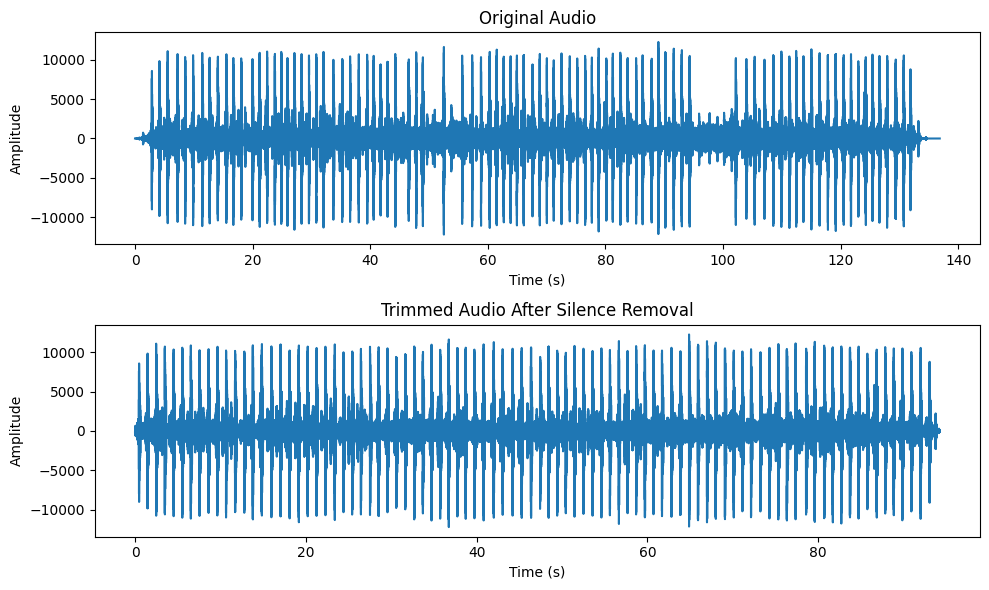

In [30]:
raw_audio_path = "data/mono_audio_wav_16kHz"
metadata_path = "data/final_metadata.csv"

def get_audio_paths(metadata_path):
    """ Reads the CSV file and generates paths and short_keys for audio files. """
    df = pd.read_csv(metadata_path)
    # Creating a list of tuples (audio_path, short_key)
    audio_info = [(os.path.join(raw_audio_path, f'{df.iloc[i]["short_key"]}.wav')) for i in range(len(df))]
    return audio_info

def read_and_remove_silence(audio_path):
    """Reads audio file, removes silence, and returns both the original and silenced-removed signals."""
    # Load the audio file
    [Fs, x] = aIO.read_audio_file(audio_path)
    
    # Convert stereo to mono if necessary
    if x.ndim > 1:
        x = x.mean(axis=1)
    
    # Remove silence
    segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window=1.0, weight=0.3, plot=False)
    
    # Concatenate the non-silent segments to get the trimmed signal
    trimmed_signal = np.concatenate([x[int(Fs * start):int(Fs * stop)] for start, stop in segments], axis=0)
    
    return Fs, x, trimmed_signal

def plot_signals(Fs, original_signal, trimmed_signal):
    """Plots the original and trimmed audio signals."""
    time_vec_original = np.arange(original_signal.shape[0]) / Fs
    time_vec_trimmed = np.arange(trimmed_signal.shape[0]) / Fs

    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(time_vec_original, original_signal)
    plt.title('Original Audio')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(time_vec_trimmed, trimmed_signal)
    plt.title('Trimmed Audio After Silence Removal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

for audio_path in get_audio_paths(metadata_path)[0:5]:
    print(audio_path)
    Fs, original_signal, trimmed_signal = read_and_remove_silence(audio_path)
    plot_signals(Fs, original_signal, trimmed_signal)